In [2]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset

data = pd.read_csv("D:\BelajarData\dataset\PTKreativaSolusi.csv")
data.head()

,EmployeeID,Division,Attrition,ReasonForLeaving,JobSatisfaction,CustomerComplaints,ProductivityScore,WorkloadScore,MoraleScore
0,1,Product Development,No,NaN,3,2,49.306580,31.869778,67.978312
1,2,Finance,No,NaN,1,3,83.439590,33.569764,71.872400
2,3,Sales,No,NaN,5,4,58.418092,48.691601,55.473647
3,4,Customer Service,No,NaN,3,0,46.194270,71.069100,61.723360
4,5,Product Development,No,NaN,2,2,70.014996,22.829266,68.022623


In [4]:
# 1.which division has the highest attrition rate
# sort dataset based on "attrition"

att_data = data[data['Attrition'] == 'Yes']

div_att_rate = att_data['Division'].value_counts() / data['Division'].value_counts() * 100

div_att_rate_sorted = div_att_rate.sort_values(ascending=False)

div_att_rate_sorted

Division
Customer Service       19.931271
Product Development    19.239905
Finance                19.000000
Sales                  15.730337
HR                     14.141414
Name: count, dtype: float64

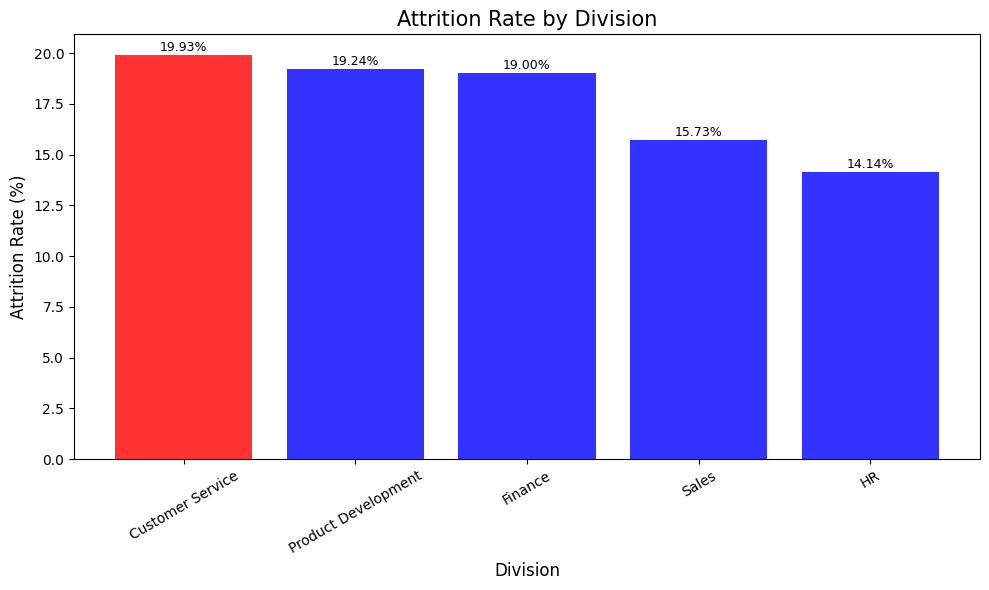

In [19]:
# 1.which division has the highest attrition rate
# data visualization

plt.figure(figsize=(10,6))
bars = plt.bar(
    div_att_rate_sorted.index,
    div_att_rate_sorted.values,
    color=['red' if division == div_att_rate_sorted.idxmax() else 'blue' for division in div_att_rate_sorted.index],
    alpha=0.8
)

plt.title("Attrition Rate by Division", fontsize=15)
plt.xlabel("Division", fontsize=12)
plt.ylabel("Attrition Rate (%)", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()+ 0.2,
        f"{bar.get_height():.2f}%",
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig("Att_Rate_Div.png", dpi=600)
plt.show()

In [13]:
# 1.which division has the highest attrition rate
# identify reason for leaving from the highest attrition division

highest_att_div = div_att_rate.idxmax()
div_att_reasons = att_data[att_data['Division'] == highest_att_div]['ReasonForLeaving']

reason_counts = div_att_reasons.value_counts()

reason_counts.head()

ReasonForLeaving
Low Salary          18
Workload            17
Poor Management     12
Personal Reasons     6
Lack of Growth       5
Name: count, dtype: int64

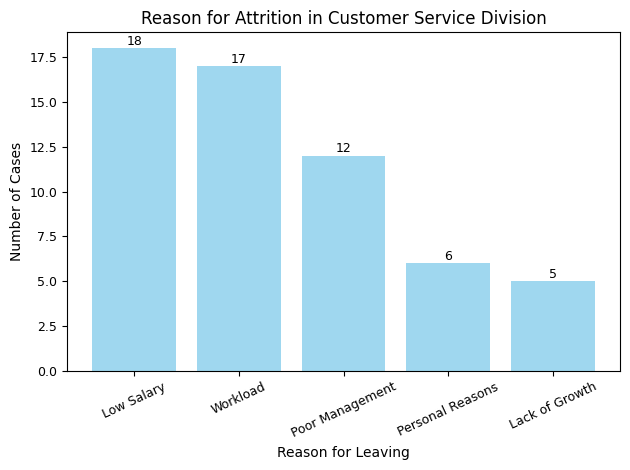

In [20]:
# 1.which division has the highest attrition rate
# visualization of reason for leaving from the highest attrition division

plt.figure(figure=(8, 5))
bars = plt.bar(reason_counts.index, reason_counts.values, color='skyblue', alpha=0.8)

plt.title(f"Reason for Attrition in {highest_att_div} Division", fontsize=12)
plt.xlabel("Reason for Leaving", fontsize=10)
plt.ylabel("Number of Cases", fontsize=10)
plt.xticks(rotation=25, fontsize=9)
plt.yticks(fontsize=9)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()+ 0.2,
        f"{int(bar.get_height())}",
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig("reason_att_CS.png", dpi=600)
plt.show()

In [15]:
# 2.What are the main reasons why employees leave the company
# count values of reason from left employees based on the category in "ResonForLeaving"

overall_reason_counts = att_data['ReasonForLeaving'].value_counts()

overall_reason_counts.head()

ReasonForLeaving
Workload            60
Low Salary          50
Poor Management     44
Lack of Growth      21
Personal Reasons    11
Name: count, dtype: int64

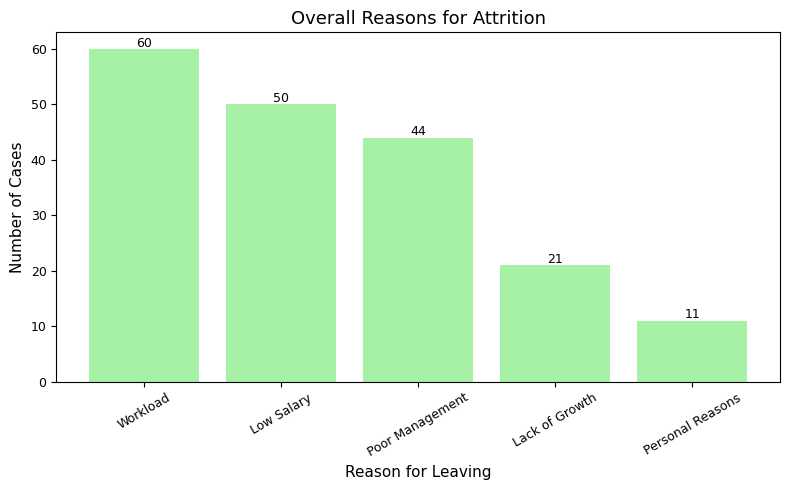

In [21]:
# 2.What are the main reasons why employees leave the company
# visualize the result

plt.figure(figsize=(8, 5))
bars = plt.bar(overall_reason_counts.index, overall_reason_counts.values, color='lightgreen', alpha=0.8)

plt.title("Overall Reasons for Attrition", fontsize=13)
plt.xlabel("Reason for Leaving", fontsize=11)
plt.ylabel("Number of Cases", fontsize=11)
plt.xticks(rotation=30, fontsize=9)
plt.yticks(fontsize=9)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()+ 0.4,
        f"{int(bar.get_height())}",
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.savefig("overall_reason_att.png", dpi=600)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4112\1917271389.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Attrition', y='JobSatisfaction', data=data_copy, palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4112\1917271389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Attrition', y='WorkloadScore', data=data_copy, palette="pastel")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4112\1917271389.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Attrition', y='MoraleScore', data=data_copy, palette="pastel")
C:\U

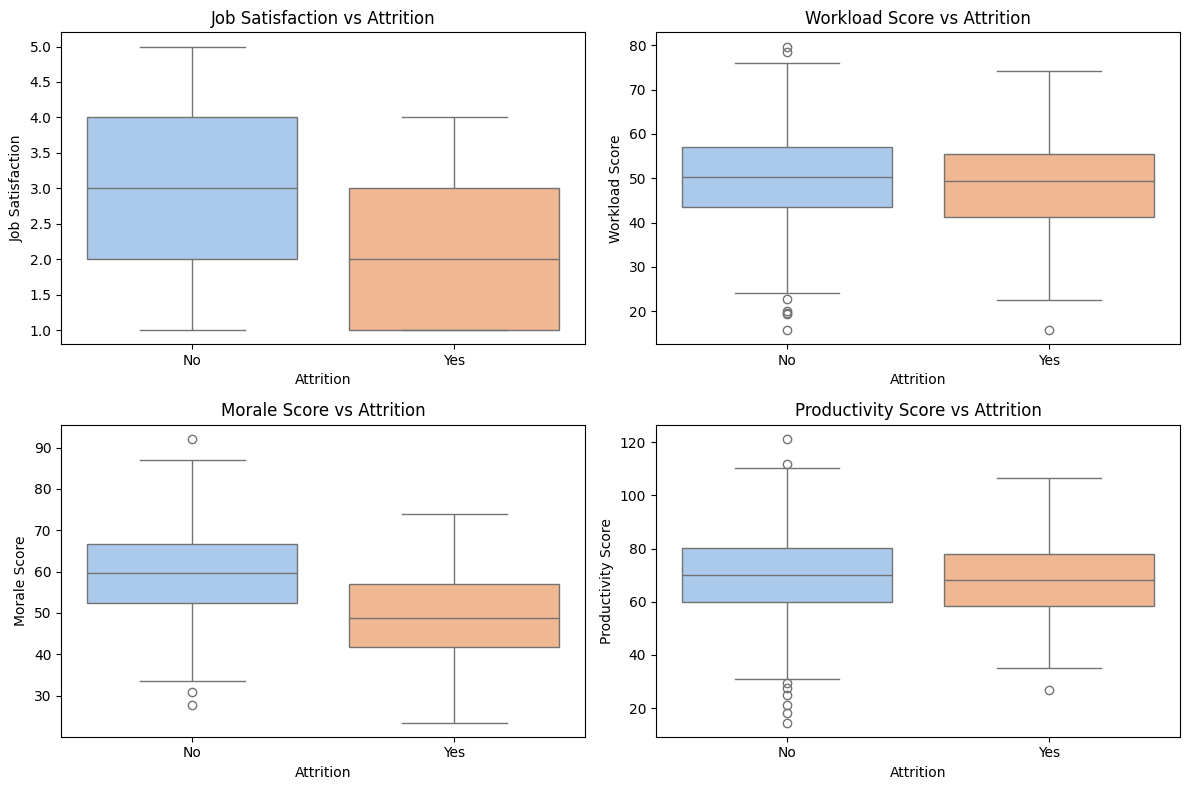

In [22]:
# 3.Are there any particular patterns in attrition data?

data_copy = data.copy()
data_copy['AttritionBinary'] = data_copy['Attrition'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 8))

# job satisfastion vs attrition
plt.subplot(2, 2, 1)
sns.boxplot(x= 'Attrition', y='JobSatisfaction', data=data_copy, palette="pastel")
plt.title("Job Satisfaction vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Job Satisfaction", fontsize=10)

# workload score vs attrition
plt.subplot(2, 2, 2)
sns.boxplot(x= 'Attrition', y='WorkloadScore', data=data_copy, palette="pastel")
plt.title("Workload Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Workload Score", fontsize=10)

# morale score vs attrition
plt.subplot(2, 2, 3)
sns.boxplot(x= 'Attrition', y='MoraleScore', data=data_copy, palette="pastel")
plt.title("Morale Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Morale Score", fontsize=10)

# productivity score vs attrition
plt.subplot(2, 2, 4)
sns.boxplot(x= 'Attrition', y='ProductivityScore', data=data_copy, palette="pastel")
plt.title("Productivity Score vs Attrition", fontsize=12)
plt.xlabel("Attrition", fontsize=10)
plt.ylabel("Productivity Score", fontsize=10)

plt.tight_layout()
plt.savefig("patterns.png", dpi=600)
plt.show()

In [18]:
# 4.What factors influence employees decision to stay?

# assumptions
rec_cost_per_employee = 200000
train_cost_per_employee = 1000000
att_per_month = 2

monthly_cost = att_per_month * (rec_cost_per_employee + train_cost_per_employee)
annual_cost = monthly_cost * 12

print("Monthly Cost = ", monthly_cost)
print("Annual Cost = ", annual_cost)

Monthly Cost =  2400000
Annual Cost =  28800000
